# **Análisis exploratorio y estadística**
# AE14.1 - Ayudantía - Conceptos de correlación

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional

En este notebook profundizaremos el concepto de correlación en base a un ejemplo.

## <font color='blue'>**Definición del problema**</font>

Un estudio pretende analizar si existe una correlación lineal positiva entre la altura y el peso de las personas. Los datos utilizados en este ejemplo se han obtenido del libro Statistical Rethinking by Richard McElreath. El set de datos contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo  (, que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.
Un estudio pretende analizar si existe una correlación lineal positiva entre la altura y el peso de las personas. Los datos utilizados en este ejemplo se han obtenido del libro Statistical Rethinking by Richard McElreath. El set de datos contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo [!Kung San](https://es.wikipedia.org/wiki/!Kung), que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='blue'>**Leyendo los datos**</font>

El código está adaptado para poder leer desde google drive, sin embargo, se puede modificar la ruta si es que se quiere trabajar en forma local.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/TalentoDigital_Mk_III/Material_clases/2-Análisis_exploratorio_estadistica/data/Howell1.csv'
datos = pd.read_csv(path)

In [ ]:
# Utilizaremos únicamente información de individuos mayores de 18 años.
print(f'Cantidad de datos originales en el archivo = {len(datos)}\n')

datos = datos[datos.age > 18]

datos.info()

Cantidad de datos originales en el archivo = 544

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


## <font color='blue'>**Análisis gráfico**</font>

En primer lugar se representan las dos variables mediante un diagrama de dispersión (scatterplot) para intuir visualmente si existe relación lineal o monotónica. Si no la hay, no tiene sentido calcular este tipo de correlaciones.

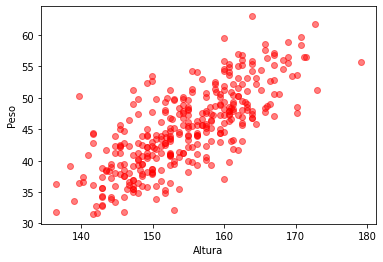

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.height,
           y=datos.weight,
           color='r',
           alpha= 0.5)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');

El diagrama de dispersión parece indicar una relación lineal positiva entre ambas variables.

## <font color='blue'>**Decidiendo qué coeficiente utilizar**</font>


Para poder elegir el coeficiente de correlación adecuado (e.g.  __Pearson__, __Spearman__ o __Kendall__), se tiene que analizar el tipo de variables y la distribución que presentan. En este caso, ambas variables son cuantitativas continuas y pueden ordenarse para convertirlas en un ranking, por lo que, a priori, los tres coeficientes podrían aplicarse. La elección se hará en función de la distribución que presenten las observaciones: normalidad, homocedasticidad y presencia de outliers.

## <font color='blue'>**Normalidad**</font>

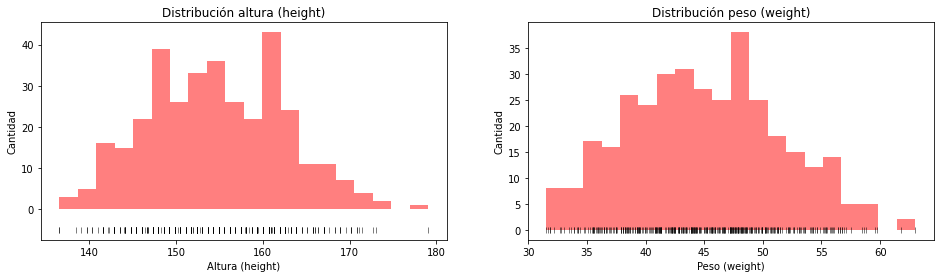

In [ ]:
# Graficamos las distribuciones de ambas variables

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

axs[0].hist(x=datos.height, bins=20, color='r', alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -5.01), '|k', markeredgewidth=0.5)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('Altura (height)')
axs[0].set_ylabel('Cantidad')

axs[1].hist(x=datos.weight, bins=20, color='r', alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.weight, -0.01), '|k', markeredgewidth=0.5)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('Peso (weight)')
axs[1].set_ylabel('Cantidad')


plt.show()

Apliquemos un __gráfico Q-Q__. En estadística, un gráfico Q-Q ("Q" viene de cuantil) es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación (en nuestro caso una Normal).

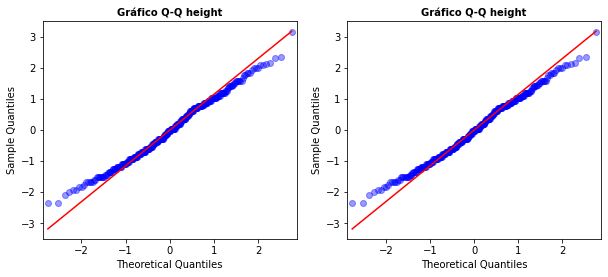

In [ ]:
# Gráfico Q-Q
import statsmodels.api as sm
from scipy import stats
import pandas.util.testing as tm

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    datos.height,
    dist  = stats.norm, # Valor por defecto
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 10)

sm.qqplot(
    datos.height,
    dist  = stats.norm, # Valor por defecto
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 10)
plt.show()

Los gráficos Q-Q nos muestran un comportamiento bastante ajustado a una disrtibución normal. Además del estudio gráfico, realizaremos dos test estadísticos que contrasten la normalidad de los datos: __Shapiro-Wilk test__ y __D'Agostino's K-squared test__. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia $\alpha$ seleccionado (por defecto $\alpha=0.05$), no hay evidencias para descartar que los datos se distribuyen de forma normal (la hipótesis nula).

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test, p_value = stats.shapiro(datos.height)
print(f"Variable height: Estadítico = {shapiro_test: 5.3f}, p-value = {p_value: 5.3f}")
shapiro_test, p_value  = stats.shapiro(datos.weight)
print(f"Variable weight: Estadítico = {shapiro_test: 5.3f}, p-value = {p_value: 5.3f}")

Variable height: Estadítico =  0.991, p-value =  0.034
Variable weight: Estadítico =  0.991, p-value =  0.037


In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test

k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2: 5.3f}, p-value = {p_value: 5.3f}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2: 5.3f}, p-value = {p_value: 5.3f}")

Variable height: Estadítico =  7.211, p-value =  0.027
Variable weight: Estadítico =  8.403, p-value =  0.015


El análisis gráfico y los test estadísticos muestran evidencias de que no se puede asumir normalidad en ninguna de las dos variables (los _p-values_ son inferiores a 0.05, nuestro valor por defecto de $\alpha$. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.



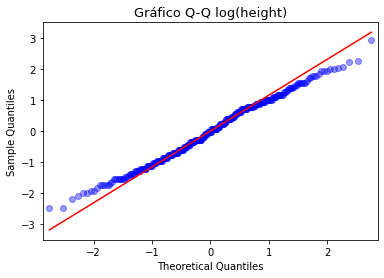


Variable height: Estadítico =  0.992, p-value =  0.070


In [ ]:
# Transformación logarítmica de los datos de peso (height)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    np.log(datos.height),
    dist  = stats.norm,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(height)', fontsize = 13)
ax.tick_params(labelsize = 10)
plt.show()

shapiro_test, p_value = stats.shapiro(np.log(datos.height))
print(f"\nVariable height: Estadítico = {shapiro_test: 5.3f}, p-value = {p_value: 5.3f}")

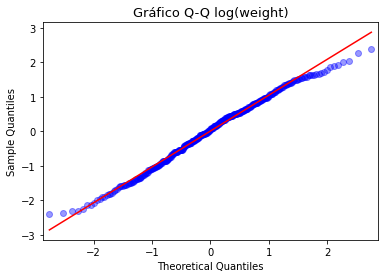


Variable weight: Estadítico =  0.990, p-value =  0.022


In [ ]:
# Transformación logarítmica de los datos de peso (weight)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sm.qqplot(
    np.log(datos.weight),
    dist  = stats.norm,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(weight)', fontsize = 13)
ax.tick_params(labelsize = 10)
plt.show()

shapiro_test, p_value = stats.shapiro(np.log(datos.weight))
print(f"\nVariable weight: Estadítico = {shapiro_test: 5.3f}, p-value = {p_value: 5.3f}")

__Conclusión:__

La trasformación logarítmica de la variable altura (height) consigue una distribución más próxima a la normal; sin embargo, no ocurre lo mismo con la variable peso (weight).



## <font color='blue'>**Homocedasticidad**</font>

La homocedasticidad implica que la varianza se mantiene constante. Puede analizarse de forma gráfica representando las observaciones en un diagrama de dispersión (como el que hicimos al inicio de este notebook) y viendo si mantiene una homogeneidad en su dispersión a lo largo del eje X. Una forma cónica es un claro indicativo de falta de homocedasticidad. Dos test estadísticos utilizados para contrastar la homocedasticidad son: test de Goldfeld-Quandt y el de Breusch-Pagan.

En el diagrama de boxplot mostrado a continuación, se aprecian patrones de dispersión similares en ambas variables.

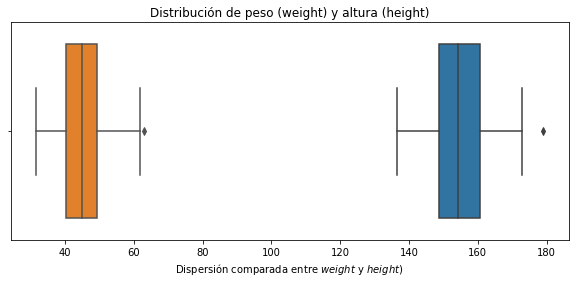

In [ ]:
# Grafico boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

c_palette = ['tab:blue', 'tab:orange']
sns.boxplot(
    x       = 'height',
    data    = datos,
    color   = c_palette[0]
    )
sns.boxplot(
    x       = 'weight',
    data    = datos,
    color   = c_palette[1]
    )
ax.set_title('Distribución de peso (weight) y altura (height)')
ax.set_xlabel('Dispersión comparada entre $weight$ y $height$)')
plt.show()


### __Ejemplo Simple:__
Imagina que eres un profesor y quieres entender cómo el tiempo que los estudiantes dedican a estudiar para un examen (variable independiente) está relacionado con sus calificaciones en ese examen (variable dependiente).

- __Situación de Homocedasticidad:__
Si observas que la variabilidad en las calificaciones de los estudiantes es más o menos la misma, independientemente de cuánto tiempo hayan estudiado (es decir, algunos estudiantes que estudian mucho tiempo obtienen calificaciones altas y bajas, y lo mismo ocurre con los que estudian poco tiempo), entonces estamos en una situación de homocedasticidad.

    En un gráfico, esto se vería como una "nube" de puntos que tiene aproximadamente el mismo grosor (dispersión vertical) a lo largo de toda la gama de tiempos de estudio.


- __Contraste con Heterocedasticidad:__
Por otro lado, si observas que los estudiantes que estudian muy poco tienen una amplia variabilidad en sus calificaciones (algunos muy altos, algunos muy bajos), pero los que estudian mucho tiempo tienen calificaciones muy consistentes y cercanas entre sí, entonces estamos en una situación de heterocedasticidad (lo opuesto a la homocedasticidad).

    En un gráfico, esto se vería como una "nube" de puntos que se ensancha o se estrecha a medida que nos movemos a lo largo del eje horizontal (tiempo de estudio).

## <font color='blue'>**Coeficientes correlación**</font>

Debido a la falta de normalidad, los resultados generados por __Pearson__ no son del todo precisos. Sin embargo, con fines ilustrativos, calcularemos los tres tipos de coeficientes.

De nuevo recordar que, cuando alguna de las condiciones asumidas por un modelo o test estadístico no se cumplen, no significa que obligatoriamente se tenga que descartar, pero hay que ser consciente de las implicaciones que tiene y reportarlo siempre en los resultados.<br><br>

### __Cálculo con Pandas__

Pandas permite calcular la correlación de dos Series (columnas de un DataFrame). El cálculo se hace por pares, eliminando automáticamente aquellos con valores nulos (`NaN`). Una limitación de Pandas es que no calcula la significancia estadística.



In [ ]:
f"{datos['weight'].corr(datos['height'], method='pearson'):5.3f}"

'0.753'

In [ ]:
# Cálculo de correlación con Pandas

print(f"Correlación Pearson   = {datos['weight'].corr(datos['height'], method='pearson'):5.3f}")
print(f"Correlación Spearman  = {datos['weight'].corr(datos['height'], method='spearman'):5.3f}")
print(f"Correlación Kendall   = {datos['weight'].corr(datos['height'], method='kendall'):5.3f}")

Correlación Pearson   = 0.753
Correlación Spearman  = 0.751
Correlación Kendall   = 0.564


### <font color='green'>**Actividad 1**</font>
### Cálculo con Scipy.stat
La implementación de `Scypy.stats` sí permite calcular la significancia estadística además del coeficiente de correlación. La función `stats.pearsonr()`, devuelve un error si alguna de las observaciones contienen valores `NaN`. Las funciones `stats.spearmanr()` y `stats.kendalltau()` sí permiten excluirlos de forma automática si se indica `nan_policy='omit'`.

Calcule la correlación utilizando los métodos de Pearson, Spearman y Kendall impe¡lementados en la librería `Scipy.stats`.

Concluya.

In [ ]:
# Tu código aquí ...

# Cálculo de correlación y significancia con Scipy


Correlación Pearson:  r=0.753, p-value=1.894e-64
Correlación Spearman: r=0.751, p-value=5.288e-64
Correlación Pearson:  r=0.564, p-value=3.163e-54


<font color='green'>Fin Actividad 1</font>

### Fuente:

Correlacion lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0)

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">